 # Unit 4 Homework Assignment
 ---
 ## Moh Jaiswal

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sb
import matplotlib.pyplot as plt # for data visualization
import csv

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Returns

In [2]:
# Reading whale, algorithmic and S&P TSX 60 returns. Set datetime index to 'date'.

In [3]:
whale_returns = pd.read_csv('/Users/mohjaiswal/Desktop/Unit-4-Homework-Asn/Resources/whale_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv('/Users/mohjaiswal/Desktop/Unit-4-Homework-Asn/Resources/algo_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_returns = pd.read_csv('/Users/mohjaiswal/Desktop/Unit-4-Homework-Asn/Resources/sp_tsx_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [4]:
algo_returns.head(3)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN


In [5]:
sp_tsx_returns.head(3)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"


In [6]:
# Count and drop nulls, checker for no nulls for Whale returns
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
whale_returns = whale_returns.dropna().copy()

In [8]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
# Count and drop nulls, checker for no nulls for Algo returns
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
algo_returns = algo_returns.dropna().copy()

In [11]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [13]:
# Clean and drop $ and , for S&P TSX 60 returns
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].str.replace("$", "")
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].str.replace(",", "")
sp_tsx_returns.head(3)

/var/folders/5f/qdj7wg7d2cq_qv31f48n29kh0000gn/T/ipykernel_94433/649892068.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_returns["Close"] = sp_tsx_returns["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47


In [14]:
#Checking and fixing the data type for S&P closing prices
sp_tsx_returns["Close"].dtype

dtype('O')

In [15]:
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].astype('float')
sp_tsx_returns["Close"].dtype

dtype('float64')

In [16]:
# Calculate Daily Returns and store in sp_tsx_daily
sp_tsx_daily = sp_tsx_returns.pct_change()
sp_tsx_daily.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [17]:
# Count Drop nulls
sp_tsx_daily.isnull().sum()

Close    1
dtype: int64

In [18]:
sp_tsx_daily = sp_tsx_daily.dropna().copy()
sp_tsx_daily.isnull().sum()

Close    0
dtype: int64

In [19]:
# Rename `Close` Column to be specific to this portfolio. (renamed to 'S&P TSX 60')
sp_tsx_daily.columns = ["S&P TSX 60"]
sp_tsx_daily.head(3)

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_daily], axis = "columns", join="inner")
#Postulated Dataframe
combined_returns.head(3)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344


---

# Quantitative Analysis

Calculations and visualizations of performance and risk metrics across all the portfolios.

## Performance Anlysis

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

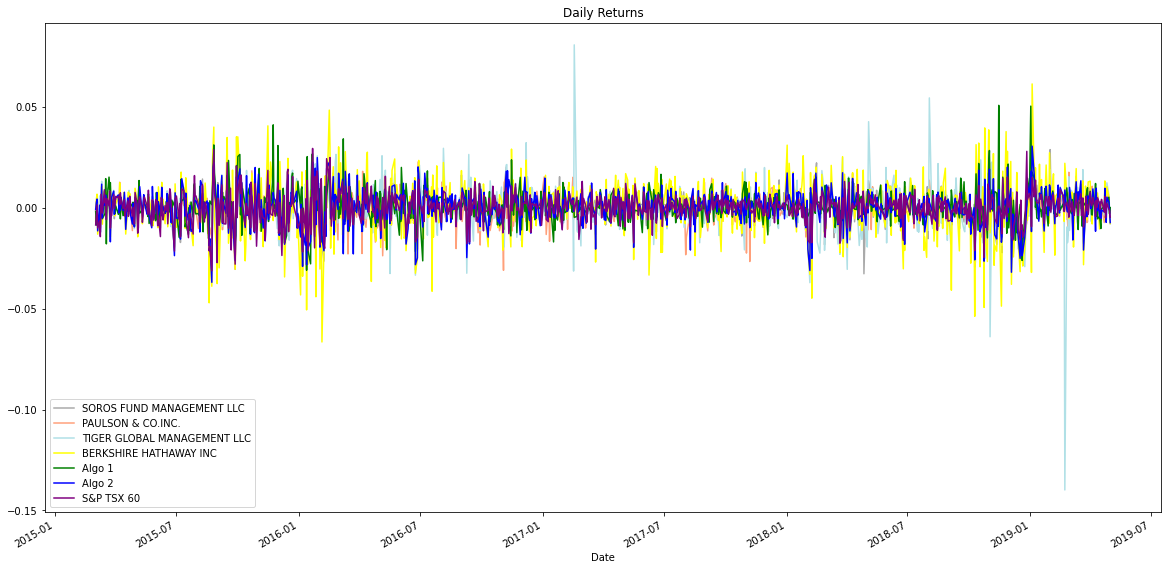

In [21]:
# Plot daily returns of all portfolios
color_theme = ['darkgray', 'lightsalmon', 'powderblue','yellow','green','blue','purple']
combined_returns.plot(figsize = (20,10), color=color_theme, title='Daily Returns')


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

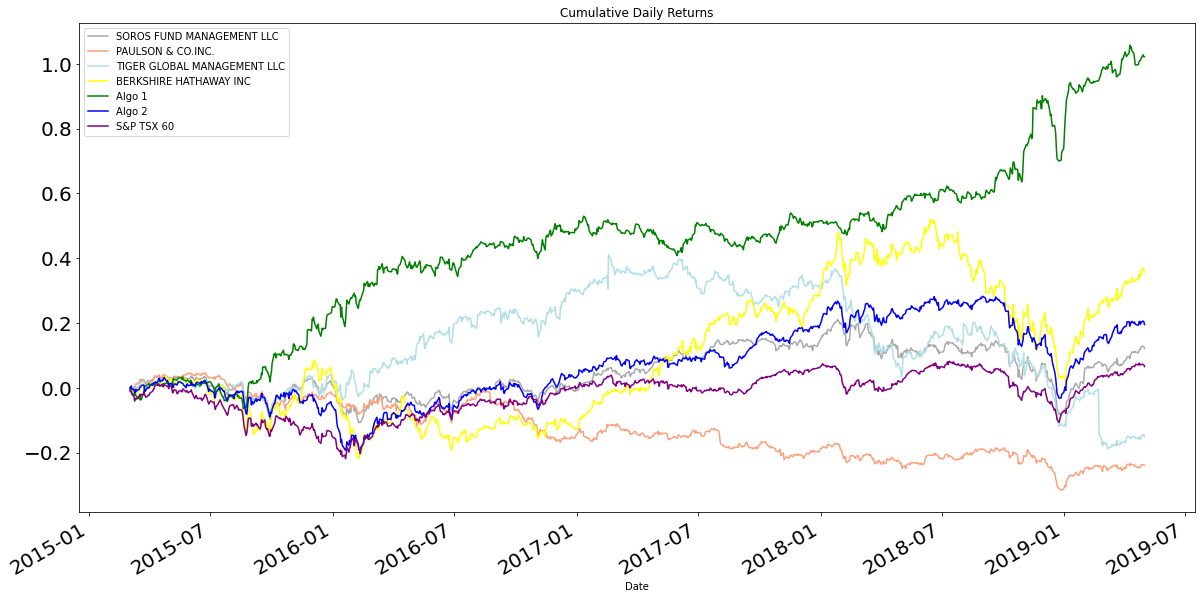

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), color=color_theme, title='Cumulative Daily Returns', fontsize=20)


---

## Risk Analysis


### Create a box plot for each portfolio


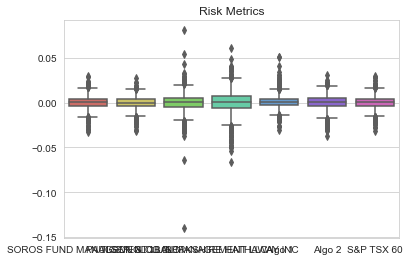

In [23]:
# Box plot to visually show risk metric Std.
sb.set_style('whitegrid')
sb.boxplot(data=combined_returns, palette='hls').set_title('Risk Metrics')
sb.set(rc={"figure.figsize":(35, 10)}) #width=40, #height=8)
# Comment: I have used seaborn to make this boxplot as part of my curiousity to try new methods. Original code:
# combined_returns.plot.box(figsize=(35,10))


### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of Whale + Algo portfolios
whale_returns_std = whale_returns.std()
algo_returns_std = algo_returns.std()

print(f"Standard Deviation of Whale portfolio is:-\n{whale_returns_std}")
print(f"\nStandard Deviation of Algorithmic portfolio is:-\n{algo_returns_std}")
# \n = leave a line

Standard Deviation of Whale portfolio is:-
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

Standard Deviation of Algorithmic portfolio is:-
Algo 1    0.007988
Algo 2    0.008466
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [25]:
# Calculate  the  average daily standard deviation of S&P TSX 60, Whale and Algo returns
sp_tsx_returns_std_avg = sp_tsx_daily.std().mean()
print(f"Standard Deviation of S&P TSX 60 is:-\n{sp_tsx_returns_std_avg}\n")

# Determine which portfolios are riskier than the S&P TSX 60
# Calculate the average Standard Deviation of Whale portfolio
whale_returns_std_avg = whale_returns_std.mean()
print(f"Average Standard Deviation of Whale portfolio is:-\n{whale_returns_std_avg}\n")

# Calculate the average Standard Deviation of Algorithmic portfolio
algo_returns_std_avg = algo_returns_std.mean()
print(f"Average Standard Deviation of Algorithmic portfolio is:-\n{algo_returns_std_avg}\n")


Standard Deviation of S&P TSX 60 is:-
0.006637362556692504

Average Standard Deviation of Whale portfolio is:-
0.009618471706059247

Average Standard Deviation of Algorithmic portfolio is:-
0.008227087477314397



In [26]:
#Whale Vs TSX 60
if whale_returns_std_avg > sp_tsx_returns_std_avg:
    print('Note: Whale portfolio is more risky than the TSX!')

else:
    print('Note: Whale portfolio is less risky than the TSX.')

Note: Whale portfolio is more risky than the TSX!


In [27]:
#Algo Vs TSX 60
if algo_returns_std_avg > sp_tsx_returns_std_avg:
    print('Note: Algorithmic portfolio is more risky than the TSX!')

else:
    print('Note: Algorithmic portfolio is less risky than the TSX.')

Note: Algorithmic portfolio is more risky than the TSX!


In [28]:
#Risk Analysis Summary
if whale_returns_std_avg > sp_tsx_returns_std_avg and algo_returns_std_avg > sp_tsx_returns_std_avg:
    print('Note: Whale and Algo portfolios are both riskier than TSX 60.')
elif whale_returns_std_avg > sp_tsx_returns_std_avg and algo_returns_std_avg < sp_tsx_returns_std_avg:
    print('Note: Whale is more riskier than TSX 60; Algo is less riskier than TSX 60.')
elif whale_returns_std_avg < sp_tsx_returns_std_avg and algo_returns_std_avg > sp_tsx_returns_std_avg:
    print('Note: Whale is less riskier than TSX 60; Algo is more riskier than TSX 60.')
else:
    print('### Note: Whale and Algo portfolios are both less riskier than TSX 60.')
    

Note: Whale and Algo portfolios are both riskier than TSX 60.


##### Whale and Algo portfolios are both riskier than TSX 60.

### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
annual_whale_returns_std = whale_returns_std*np.sqrt(252)
annual_algo_returns_std = algo_returns_std*np.sqrt(252)
annual_sp_tsx_returns_std = sp_tsx_returns_std_avg*np.sqrt(252)

#Print annualized standard deviation of all portfolio
print(f"Annualized Standard Deviation of Whale portfolio is:-\n{annual_whale_returns_std}")
print(f"\nAnnualized Standard Deviation of Algo portfolio is:-\n{annual_algo_returns_std}")
print(f"\nAnnualized Standard Deviation of S&P TSX is:-\n{annual_sp_tsx_returns_std}")


Annualized Standard Deviation of Whale portfolio is:-
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

Annualized Standard Deviation of Algo portfolio is:-
Algo 1    0.126801
Algo 2    0.134401
dtype: float64

Annualized Standard Deviation of S&P TSX is:-
0.10536486411828129


In [30]:
# Visualize the sharpe ratios as a bar plot
 

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

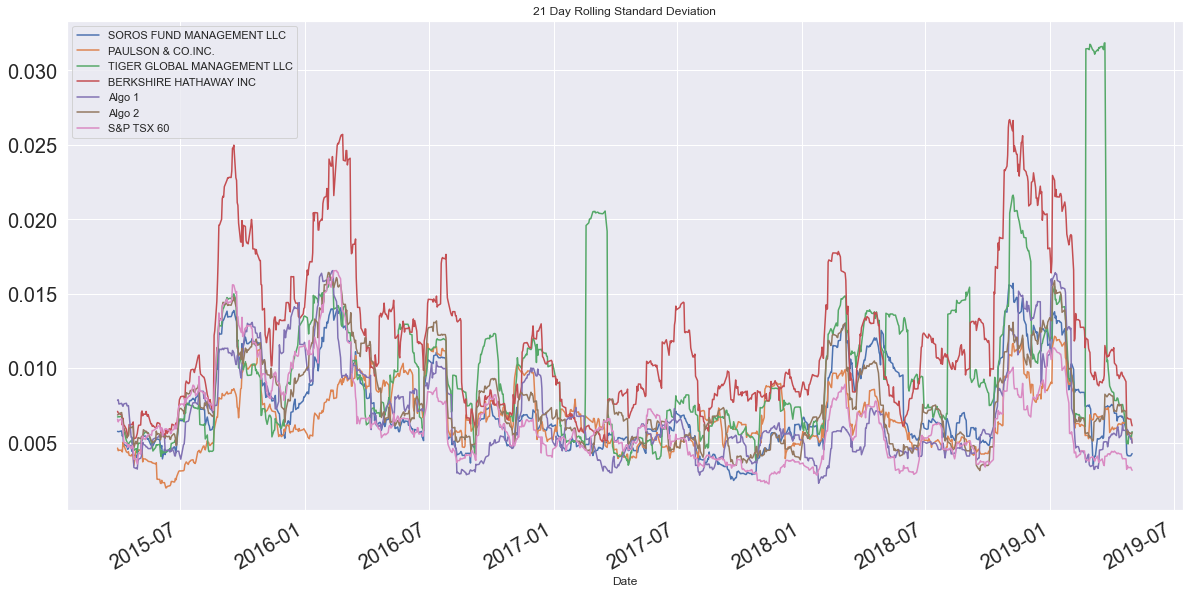

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Rolling Standard Deviation', fontsize=20)

                                               
                                               

### Calculate and plot the correlation

Text(0.5, 0.98, 'Similarity of portfolio performance')

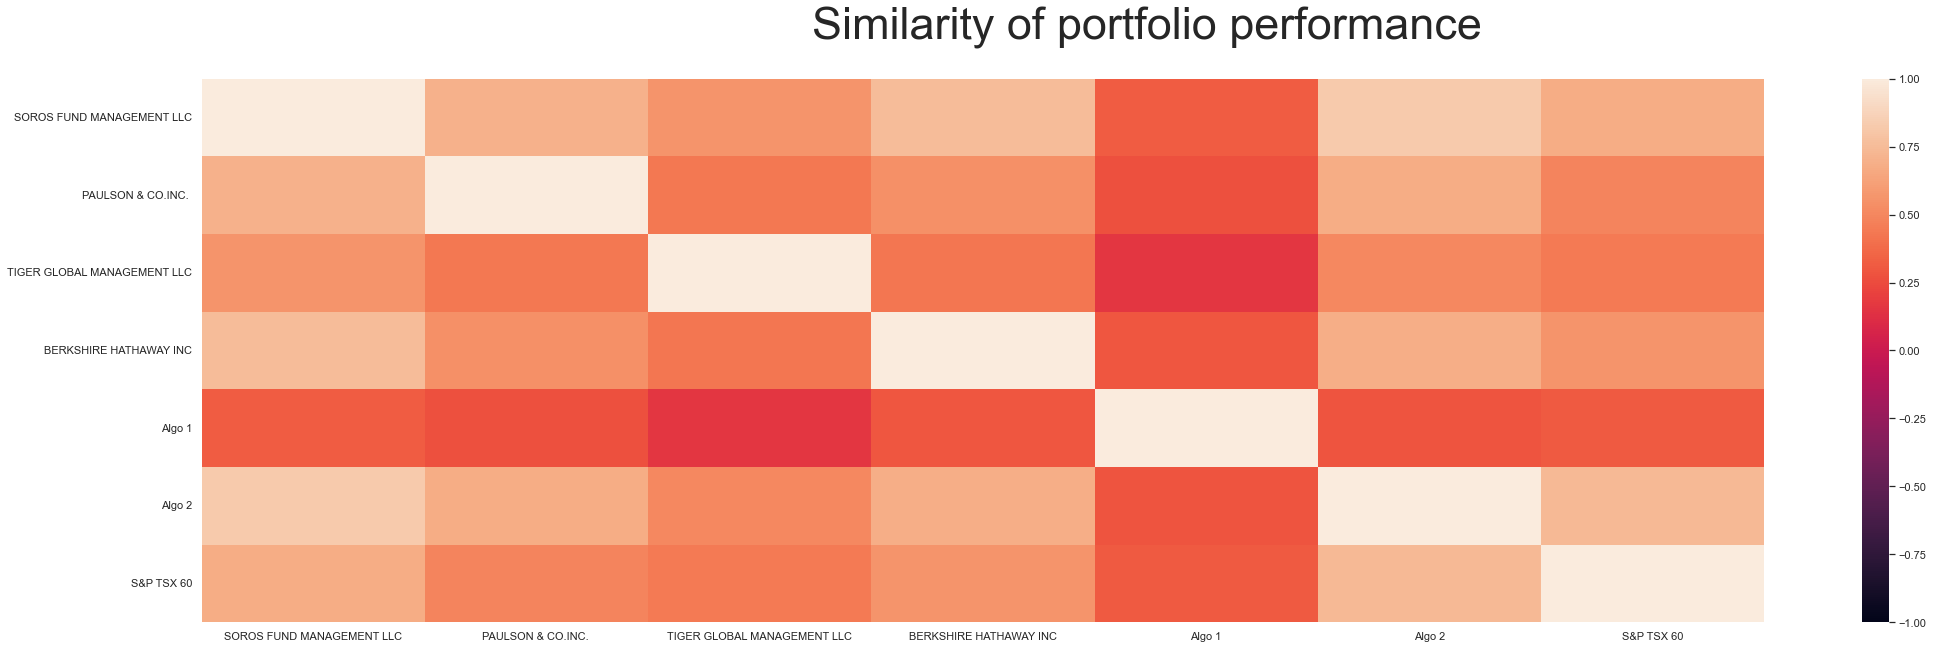

In [32]:
# Calculate the correlation
returns_correlation = combined_returns.corr()
returns_correlation

# Display de correlation matrix
sb.heatmap(returns_correlation, vmin=-1, vmax=1)
#plt.title("Similarity of portfolio performance", fontsize =12)
#Comment: I used suptitle to give my title more space between the heatmap and itself
plt.suptitle('Similarity of portfolio performance', fontsize =45)



##### Correlation of 1 means exactly the same, as it gets closed to 0, correlation between portfolio and TSX 60 gets more inelastic (un-correlated). All interpretations are approximated and should not be relied on to make any deductions without heeding with caution.

###### Algo 2 @ 0.83 , most similar to TSX 60.

###### Soros @ 0.70 is 2nd most similar to TSX 60.

###### Berkshire @ 0.68 , 3rd most similar to TSX 60.

###### Paulson @ 0.63 , 4th most similar to TSX 60.

###### Tiger @ 0.60 ,  5th most similar to TSX 60.

###### Algo 1 @ 0.30 ,  least similar to TSX 60.


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [33]:
# Calculate covariance of a single portfolio
soros_cov = combined_returns["SOROS FUND MANAGEMENT LLC"].cov(combined_returns["S&P TSX 60"])
paulson_cov = combined_returns["PAULSON & CO.INC. "].cov(combined_returns["S&P TSX 60"])
tiger_cov = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_returns["S&P TSX 60"])
berkshire_cov = combined_returns["BERKSHIRE HATHAWAY INC"].cov(combined_returns["S&P TSX 60"])
algo1_cov = combined_returns["Algo 1"].cov(combined_returns["S&P TSX 60"])
algo2_cov = combined_returns["Algo 2"].cov(combined_returns["S&P TSX 60"])
print(f"Soros Fund Management LLC covariance: {soros_cov}")
print(f"Paulson & Co. Inc. covariance: {paulson_cov}")
print(f"Tiger Global Management LLC covariance: {tiger_cov}")
print(f"Berkshire Hathaway Inc. covariance: {berkshire_cov}")
print(f"Algo1 covariance: {algo1_cov}")
print(f"Algo2 covariance: {algo2_cov}")


Soros Fund Management LLC covariance: 3.710689907855224e-05
Paulson & Co. Inc. covariance: 2.3894916563613427e-05
Tiger Global Management LLC covariance: 3.372724149435498e-05
Berkshire Hathaway Inc. covariance: 5.027336077110012e-05
Algo1 covariance: 1.6563000308911378e-05
Algo2 covariance: 4.3187044300842574e-05


In [34]:
# Computing beta
#Beta formula = individual portfolio covariance/ combined_returns variance 
combined_returns_var = combined_returns["S&P TSX 60"].var()
print(f"S&P TSX 60 variance: {combined_returns_var}")

soros_beta = soros_cov/combined_returns_var
paulson_beta = paulson_cov/combined_returns_var
tiger_beta = tiger_cov/combined_returns_var
berkshire_beta = berkshire_cov/combined_returns_var
algo1_beta = algo1_cov/combined_returns_var
algo2_beta = algo2_cov/combined_returns_var

print(f"Portfolio Betas-\nSoros Fund Management LLC: {soros_beta} \nPaulson & Co. Inc.: {paulson_beta} \nTiger Global Management LLC: {tiger_beta} \nBerkshire Hathaway Inc.: {berkshire_beta} \nAlgo1: {algo1_beta} | Algo2: {algo2_beta}")


S&P TSX 60 variance: 4.9479515915131015e-05
Portfolio Betas-
Soros Fund Management LLC: 0.7499446668435334 
Paulson & Co. Inc.: 0.4829254312956258 
Tiger Global Management LLC: 0.6816404904244641 
Berkshire Hathaway Inc.: 1.0160439091063609 
Algo1: 0.33474459081856844 | Algo2: 0.8728267344999594


Text(0.5, 1.0, 'Rolling 60-Day Beta of Berkshire')

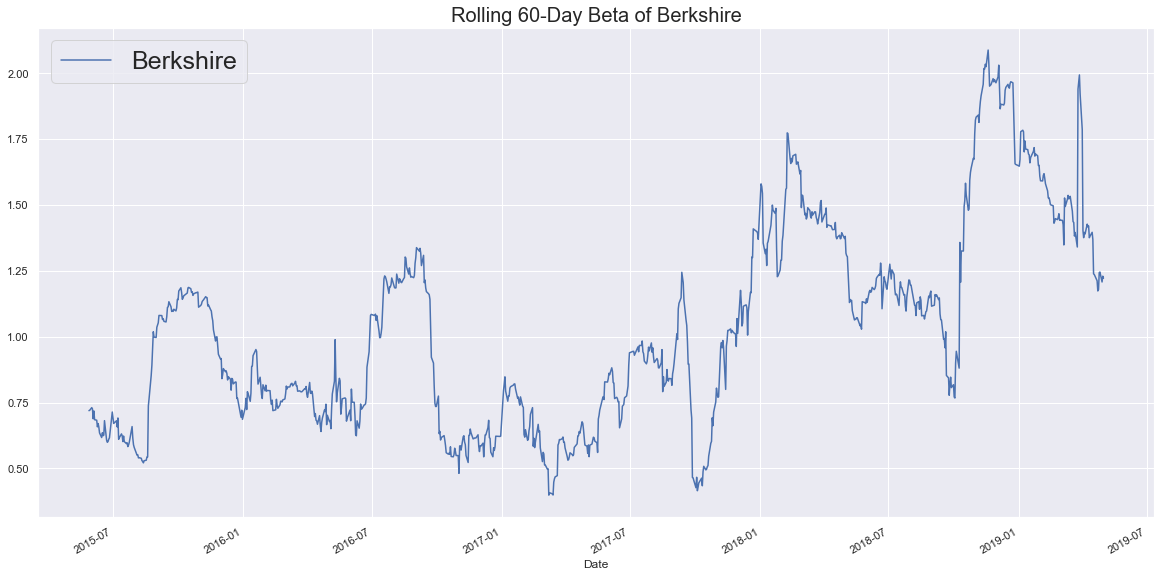

In [35]:
# Plot of 60 day beta trend: Berkshire Hathway

# Calculate the rolling beta for Berkshire portfolio using a 60-day window
#Berkshire Covariance
rolling_berkshire_covariance = combined_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_returns["S&P TSX 60"])
#Market Variance
rolling_variance_mkt = combined_returns["S&P TSX 60"].rolling(window=60).var()
#Rolling Beta
rolling_berkshire_beta = rolling_berkshire_covariance/rolling_variance_mkt
# Plot
ax = rolling_berkshire_beta.plot(figsize=(20, 10),title="Rolling 60-Day Beta of Berkshire",label="Berkshire")
plt.legend(loc="upper left", fontsize=25)
ax.set_title('Rolling 60-Day Beta of Berkshire', fontsize=20)


## Rolling Statistics Challenge: Exponentially Weighted Average 

###### An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.


In [36]:
# Use `ewm` to calculate the rolling window, setting times 
combined_returns_ewm = combined_returns.ewm(halflife =21).std()
combined_returns_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


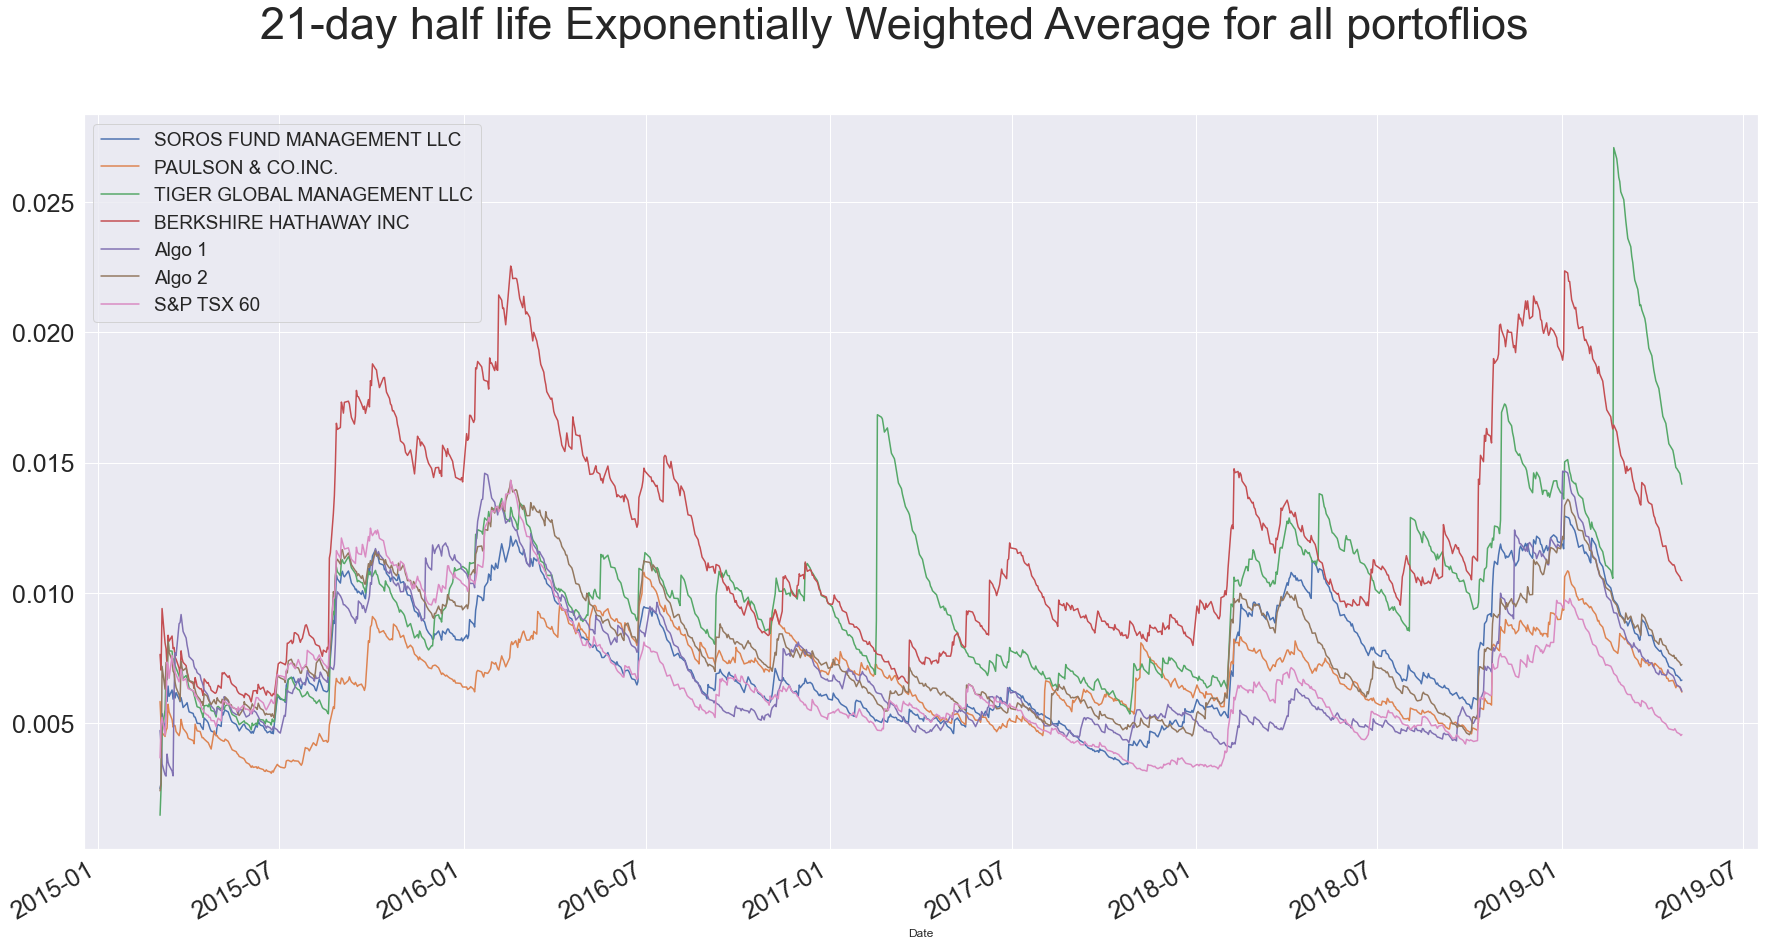

In [37]:
combined_returns_ewm.plot( figsize=(30, 15), fontsize = 25)
plt.suptitle('21-day half life Exponentially Weighted Average for all portoflios', fontsize =45)
plt.legend(loc="upper left", fontsize=19)


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Annualized Sharpe Ratios
# Calculate the annualized values by assuming: 252 trading days
whale_sharpe_ratios = ((whale_returns.mean() * 252) / (annual_whale_returns_std))
algo_sharpe_ratios = ((algo_returns.mean() * 252) / (annual_algo_returns_std))
sp_tsx_sharpe_ratios = ((sp_tsx_returns.mean() * 252) / (annual_sp_tsx_returns_std))

#Print Sharpe Ratios
print(f"Following is the Sharpe Ratios of Whale portofolio:- \n{whale_sharpe_ratios}\n")
print(f"Following is the Sharpe Ratios of Algorithmic portofolio:- \n{algo_sharpe_ratios}\n")
print(f"Following is the Sharpe Ratios of S&P TSX:- \n{sp_tsx_sharpe_ratios}")

Following is the Sharpe Ratios of Whale portofolio:- 
SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64

Following is the Sharpe Ratios of Algorithmic portofolio:- 
Algo 1    1.300176
Algo 2    0.639258
dtype: float64

Following is the Sharpe Ratios of S&P TSX:- 
Close    3.510570e+07
dtype: float64


/var/folders/5f/qdj7wg7d2cq_qv31f48n29kh0000gn/T/ipykernel_94433/1424706793.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')


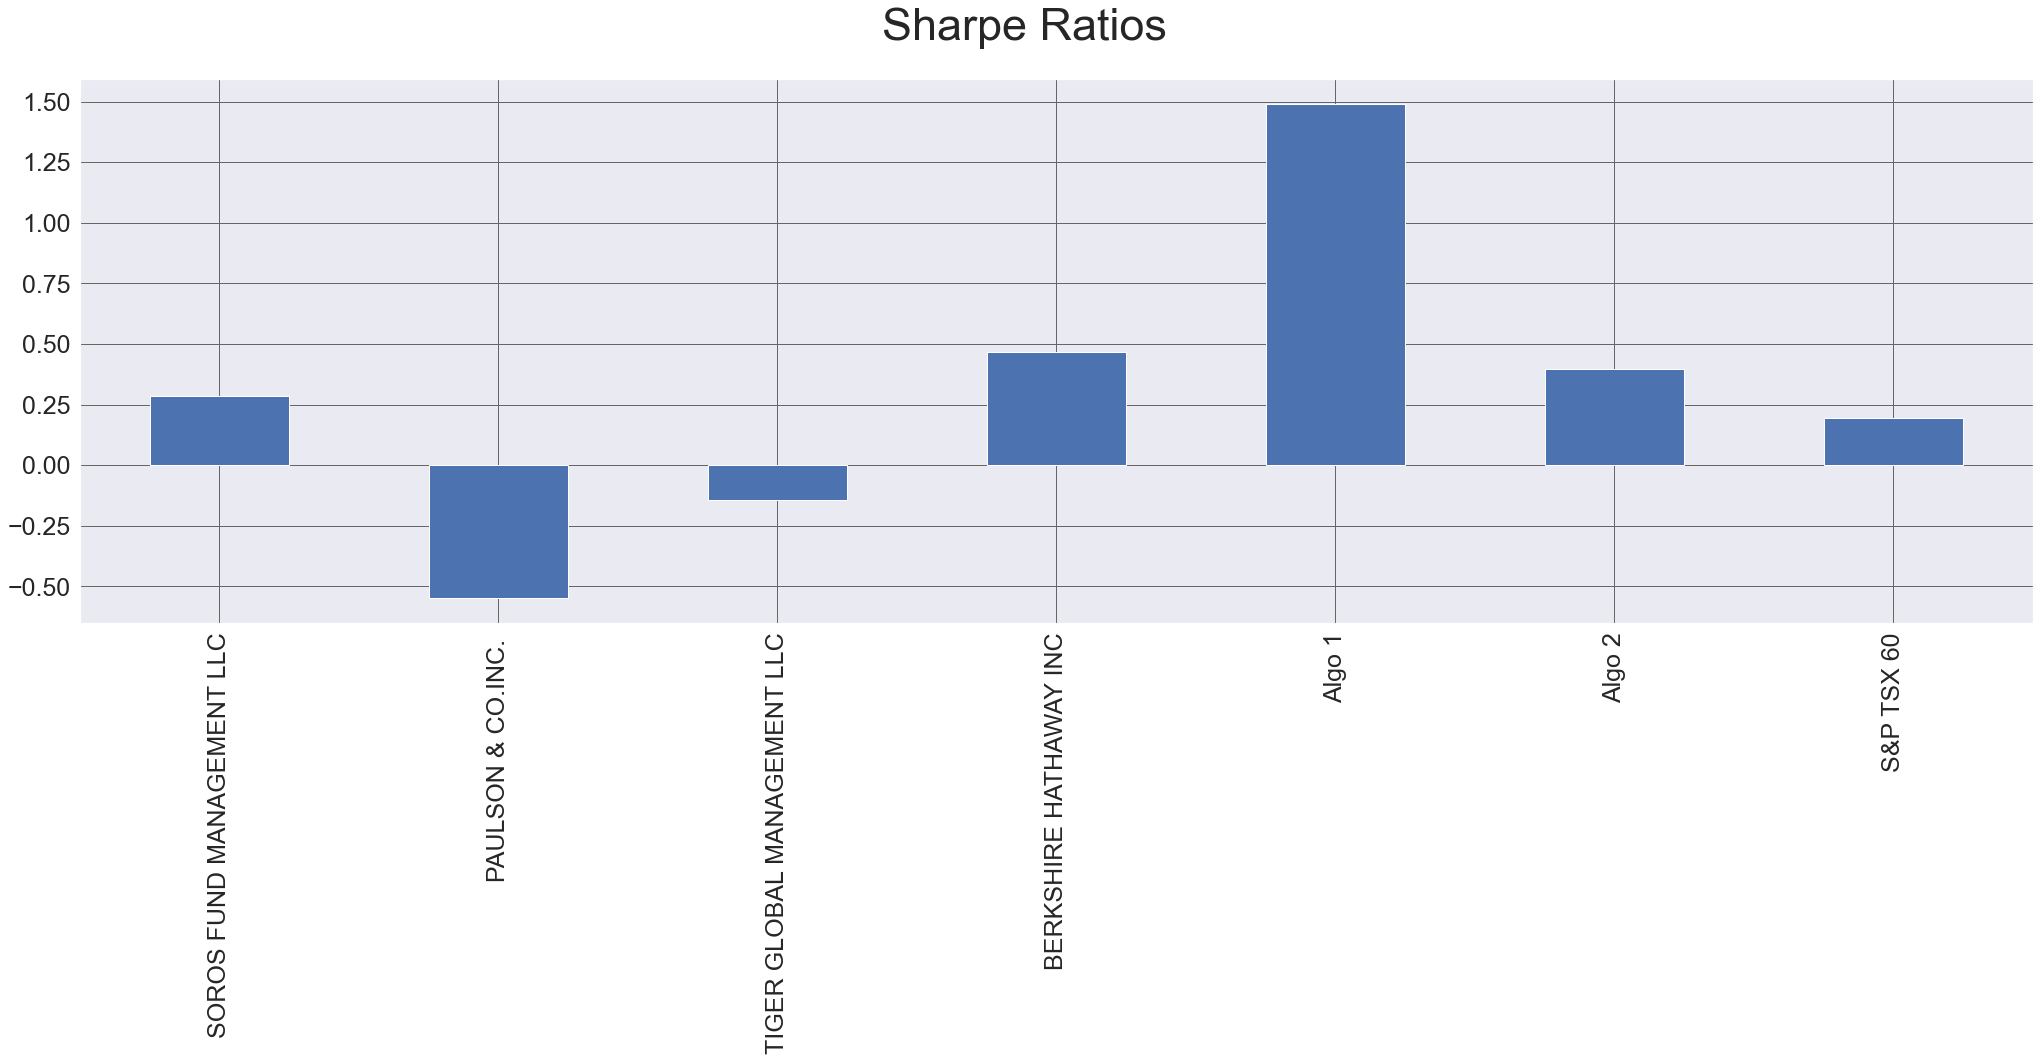

In [39]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios = ((combined_returns.mean() * 252) / (combined_returns.std()*np.sqrt(252)))
sharpe_ratios.plot.bar(fontsize = 25)
plt.suptitle('Sharpe Ratios', fontsize =45)
plt.grid(b=True, which='major', color='#666666', linestyle='-')




### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

We can visually see that Algo 1 stands out with the highest sharpe ratio, therefore They both (on average) outperform whales as well as S&P! The same will be found when calculating averages and comparing the three. Though Algo 1 is the most dominant in terms of outperforming the market.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [40]:
# Reading data from 1st stock
shop_df = pd.read_csv('/Users/mohjaiswal/Desktop/Unit-4-Homework-Asn/Resources/shop_historical.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.head()


,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [41]:
# Reading data from 2nd stock
otex_df = pd.read_csv('/Users/mohjaiswal/Desktop/Unit-4-Homework-Asn/Resources/otex_historical.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.head()


,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [42]:
# Reading data from 3rd stock
one_df = pd.read_csv('/Users/mohjaiswal/Desktop/Unit-4-Homework-Asn/Resources/l_historical.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
one_df.head()


,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [43]:
# Combine all stocks in a single DataFrame
concat_df = pd.concat([shop_df, otex_df, one_df], axis = "columns", join="inner")
concat_df.head()


,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [44]:
# Reset Date index
concat_df = concat_df.reset_index()
concat_df.head()


,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
1,2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2,2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
3,2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
4,2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [45]:
# Drop Symbols columns
concat_df = concat_df.drop(columns = ["Symbol"])

In [46]:
# Reorganize portfolio data by having a column per symbol
concat_df.columns = ["Date", "SHOP" , "OTEX", "One"]
concat_df.head()


,Date,SHOP,OTEX,One
0,2018-01-02,132.06,43.58,57.99
1,2018-01-03,135.15,43.07,57.41
2,2018-01-04,137.46,42.91,57.42
3,2018-01-05,137.26,42.57,57.42
4,2018-01-08,139.51,42.16,56.86


In [47]:
concat_df = concat_df.set_index(pd.to_datetime(concat_df["Date"], infer_datetime_format=True))
concat_df.head()


,Date,SHOP,OTEX,One
Date,,,,
2018-01-02,2018-01-02,132.06,43.58,57.99
2018-01-03,2018-01-03,135.15,43.07,57.41
2018-01-04,2018-01-04,137.46,42.91,57.42
2018-01-05,2018-01-05,137.26,42.57,57.42
2018-01-08,2018-01-08,139.51,42.16,56.86


In [48]:
concat_df = concat_df.drop(columns=["Date"])
concat_df.head()


,SHOP,OTEX,One
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [49]:
# Calculate daily returns
comb_daily_returns = concat_df.pct_change()

# Drop NAs
comb_daily_returns = comb_daily_returns.dropna().copy()

# Display few rows of the combined Dataframe after calculating the Daily Returns
comb_daily_returns.head()


,SHOP,OTEX,One
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = comb_daily_returns.dot(weights)

# Display few rows of the portfolio Dataframe
portfolio_returns.head()


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([combined_returns, portfolio_returns], axis = "columns", join = "inner")

# Add the column name for the custom portfolio
combined_returns = combined_returns.rename(columns = {0 :"Custom Portfolio"})

# Display few rows of the combined Dataframe after renaming the last column as the custom portfolio
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna().copy()

combined_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`
annual_combined_returns_std = combined_returns.std()* np.sqrt(252)

# Sort in ascending order and display the annualized standard deviation
annual_combined_returns_std = annual_combined_returns_std.sort_values(ascending = True)
print(f"Annualized Standard deviation of all portfolio are as follows:-\n{annual_combined_returns_std}")

Annualized Standard deviation of all portfolio are as follows:-
S&P TSX 60                     0.099121
PAULSON & CO.INC.              0.114343
Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
TIGER GLOBAL MANAGEMENT LLC    0.219833
Custom Portfolio               0.224346
BERKSHIRE HATHAWAY INC         0.227445
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

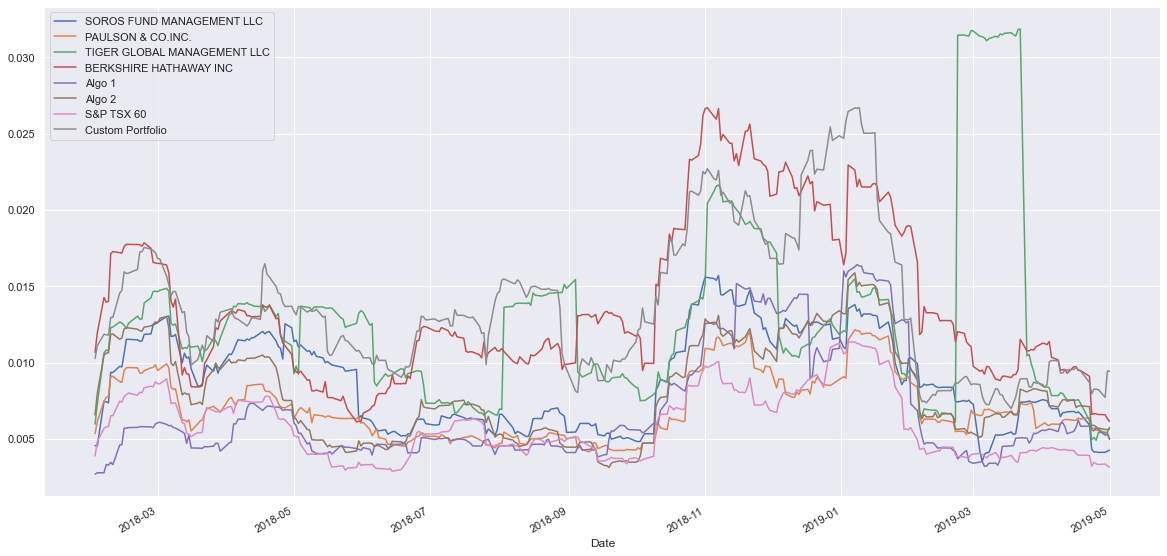

In [56]:
# Calculate rolling standard deviation
combined_returns_std_new = combined_returns.rolling(window=21).std()

# Plot rolling standard deviation
combined_returns_std_new.plot(figsize=(20,10))


### Calculate and plot the correlation

<AxesSubplot:>

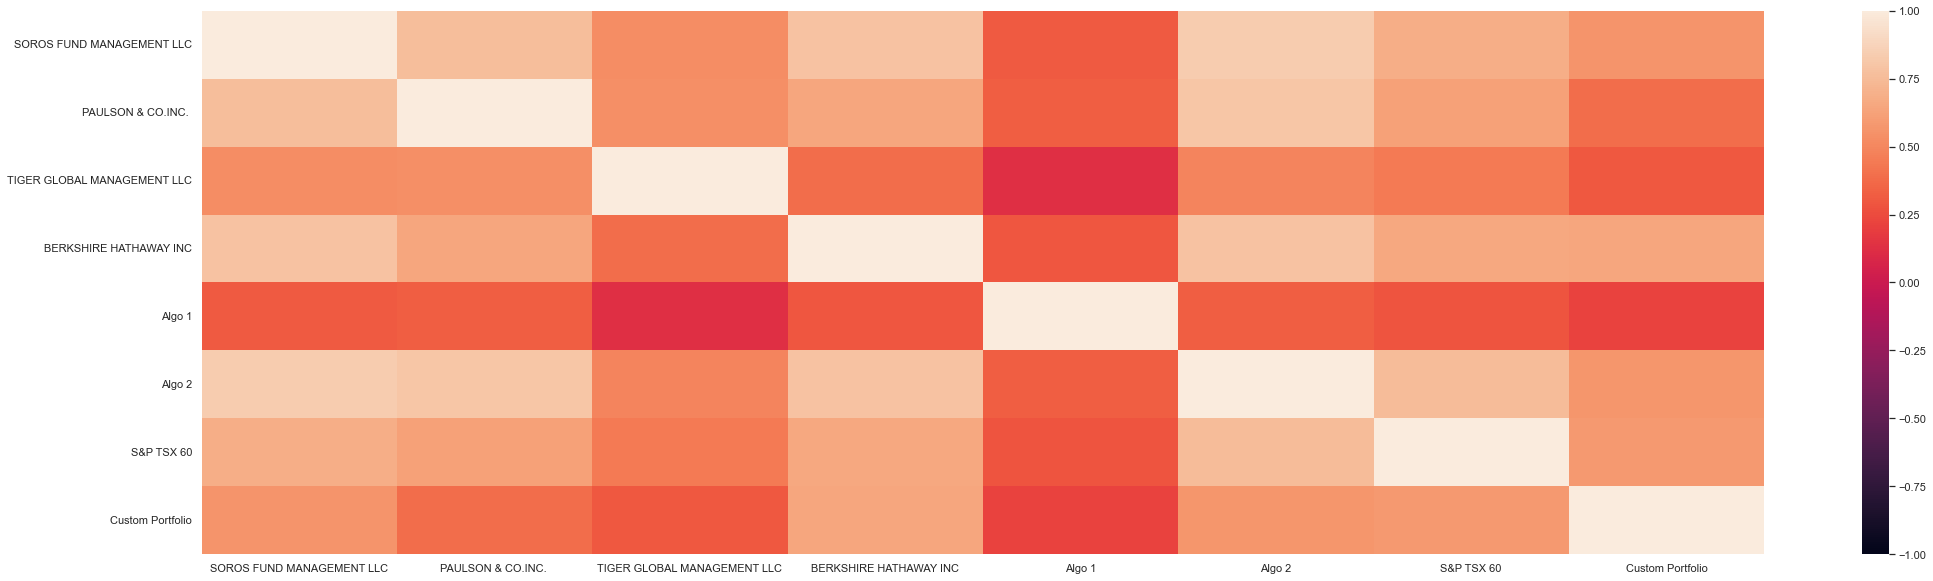

In [58]:
# Calculate and plot the correlation
combined_returns_correlation = combined_returns.corr()

sb.heatmap(combined_returns_correlation, vmin=-1, vmax=1)


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Soros Fund Management LLC covariance: 3.9346227327542165e-05
Paulson & Co. Inc. covariance: 2.8052450990864664e-05
Tiger Global Management LLC covariance: 3.794066016925674e-05
Berkshire Hathaway Inc. covariance: 5.813424169239457e-05
Algo1 covariance: 1.3445279950221166e-05
Algo2 covariance: 4.084555342870371e-05
Custom Portfolio covariance: 5.111305460230444e-05

S&P TSX variance: 3.898788619333669e-05

Beta of all portfolios are as follows:- 
Soros Fund Management LLC:   1.0091910890584963 | Paulson & Co. Inc.:       0.7195171046656802 
Tiger Global Management LLC: 0.973139707577711 | Berkshire Hathaway Inc. : 1.4910847283208222 
Algo1:                       0.3448578844092107 | Algo2:                    1.0476472929605636 
Custom Portfolio:            1.3109983534075267


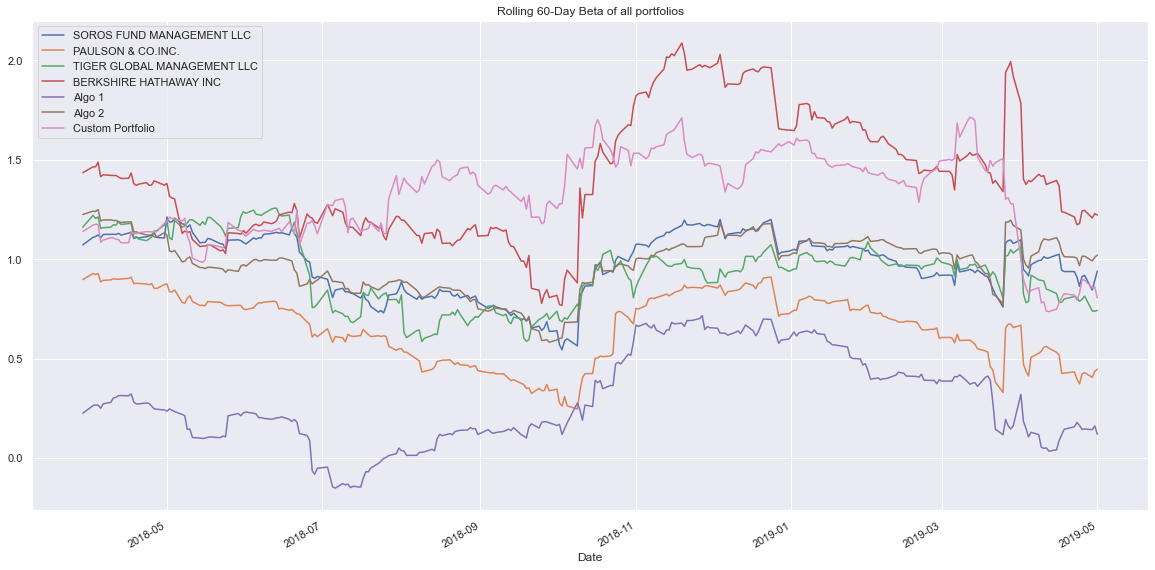

In [63]:
# Calculate and plot Beta
# Calculate and plot Beta

# Calculate covariance of single portfolio
soros_covariance = combined_returns["SOROS FUND MANAGEMENT LLC"].cov(combined_returns["S&P TSX 60"])
paulson_covariance = combined_returns["PAULSON & CO.INC. "].cov(combined_returns["S&P TSX 60"])
tiger_covariance = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_returns["S&P TSX 60"])
berkshire_covariance = combined_returns["BERKSHIRE HATHAWAY INC"].cov(combined_returns["S&P TSX 60"])
algo1_covariance = combined_returns["Algo 1"].cov(combined_returns["S&P TSX 60"])
algo2_covariance = combined_returns["Algo 2"].cov(combined_returns["S&P TSX 60"])
custom_covariance = combined_returns["Custom Portfolio"].cov(combined_returns["S&P TSX 60"])

# Display the covariance of each portfolio
print(f"Soros Fund Management LLC covariance: {soros_covariance}")
print(f"Paulson & Co. Inc. covariance: {paulson_covariance}")
print(f"Tiger Global Management LLC covariance: {tiger_covariance}")
print(f"Berkshire Hathaway Inc. covariance: {berkshire_covariance}")
print(f"Algo1 covariance: {algo1_covariance}")
print(f"Algo2 covariance: {algo2_covariance}")
print(f"Custom Portfolio covariance: {custom_covariance}")

# Calculate variance of S&P TSX
variance_mkt = combined_returns["S&P TSX 60"].var()

# Diplay S&P TSX variance
print(f"\nS&P TSX variance: {variance_mkt}")

# Computing beta
soros_beta = soros_covariance/variance_mkt
paulson_beta = paulson_covariance/variance_mkt
tiger_beta = tiger_covariance/variance_mkt
berkshire_beta = berkshire_covariance/variance_mkt
algo1_beta = algo1_covariance/variance_mkt
algo2_beta = algo2_covariance/variance_mkt
custom_beta = custom_covariance/variance_mkt

# Display the beta 
print(f"\nBeta of all portfolios are as follows:- \nSoros Fund Management LLC:   {soros_beta} | Paulson & Co. Inc.:       {paulson_beta} \nTiger Global Management LLC: {tiger_beta} | Berkshire Hathaway Inc. : {berkshire_beta} \nAlgo1:                       {algo1_beta} | Algo2:                    {algo2_beta} \nCustom Portfolio:            {custom_beta}")

# Calculate 60-day rolling covariance of each stock vs. S&P TSX and then plot the data
rolling_soros_covariance = combined_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_returns["S&P TSX 60"])
rolling_paulson_covariance = combined_returns["PAULSON & CO.INC. "].rolling(window=60).cov(combined_returns["S&P TSX 60"])
rolling_tiger_covariance = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(combined_returns["S&P TSX 60"])
rolling_berkshire_covariance = combined_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_returns["S&P TSX 60"])
rolling_algo1_covariance = combined_returns["Algo 1"].rolling(window=60).cov(combined_returns["S&P TSX 60"])
rolling_algo2_covariance = combined_returns["Algo 2"].rolling(window=60).cov(combined_returns["S&P TSX 60"])
rolling_custom_covariance = combined_returns["Custom Portfolio"].rolling(window=60).cov(combined_returns["S&P TSX 60"])

# Calculate 60-day rolling variance of daily returns S&P TSX
rolling_variance_mkt = combined_returns["S&P TSX 60"].rolling(window=60).var()

# Calculate 21-day rolling beta of all daily returns of the portfolio of stocks and plot the data
rolling_soros_beta = rolling_soros_covariance/rolling_variance_mkt
rolling_paulson_beta = rolling_paulson_covariance/rolling_variance_mkt
rolling_tiger_beta = rolling_tiger_covariance/rolling_variance_mkt
rolling_berkshire_beta = rolling_berkshire_covariance/rolling_variance_mkt
rolling_algo1_beta = rolling_algo1_covariance/rolling_variance_mkt
rolling_algo2_beta = rolling_algo2_covariance/rolling_variance_mkt
rolling_custom_beta = rolling_custom_covariance/rolling_variance_mkt

# Set the figure and plot the different stocks beta values as multiple trends on the same figure
ax = rolling_soros_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of all portfolios")
rolling_paulson_beta.plot(ax=ax)
rolling_tiger_beta.plot(ax=ax)
rolling_berkshire_beta.plot(ax=ax)
rolling_algo1_beta.plot(ax=ax)
rolling_algo2_beta.plot(ax=ax)
rolling_custom_beta.plot(ax=ax)

#Set the legend of the figure
ax.legend(["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "Custom Portfolio"])
           
    
           

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [64]:
# Calculate Annualized Sharpe Ratios
annual_combined_sharpe_ratios = ((combined_returns.mean() * 252) / (combined_returns.std()*np.sqrt(252)))
print (f"Following are the Annualized Sharpe Ratios:- \n{annual_combined_sharpe_ratios}")



Following are the Annualized Sharpe Ratios:- 
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
Custom Portfolio               1.564547
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

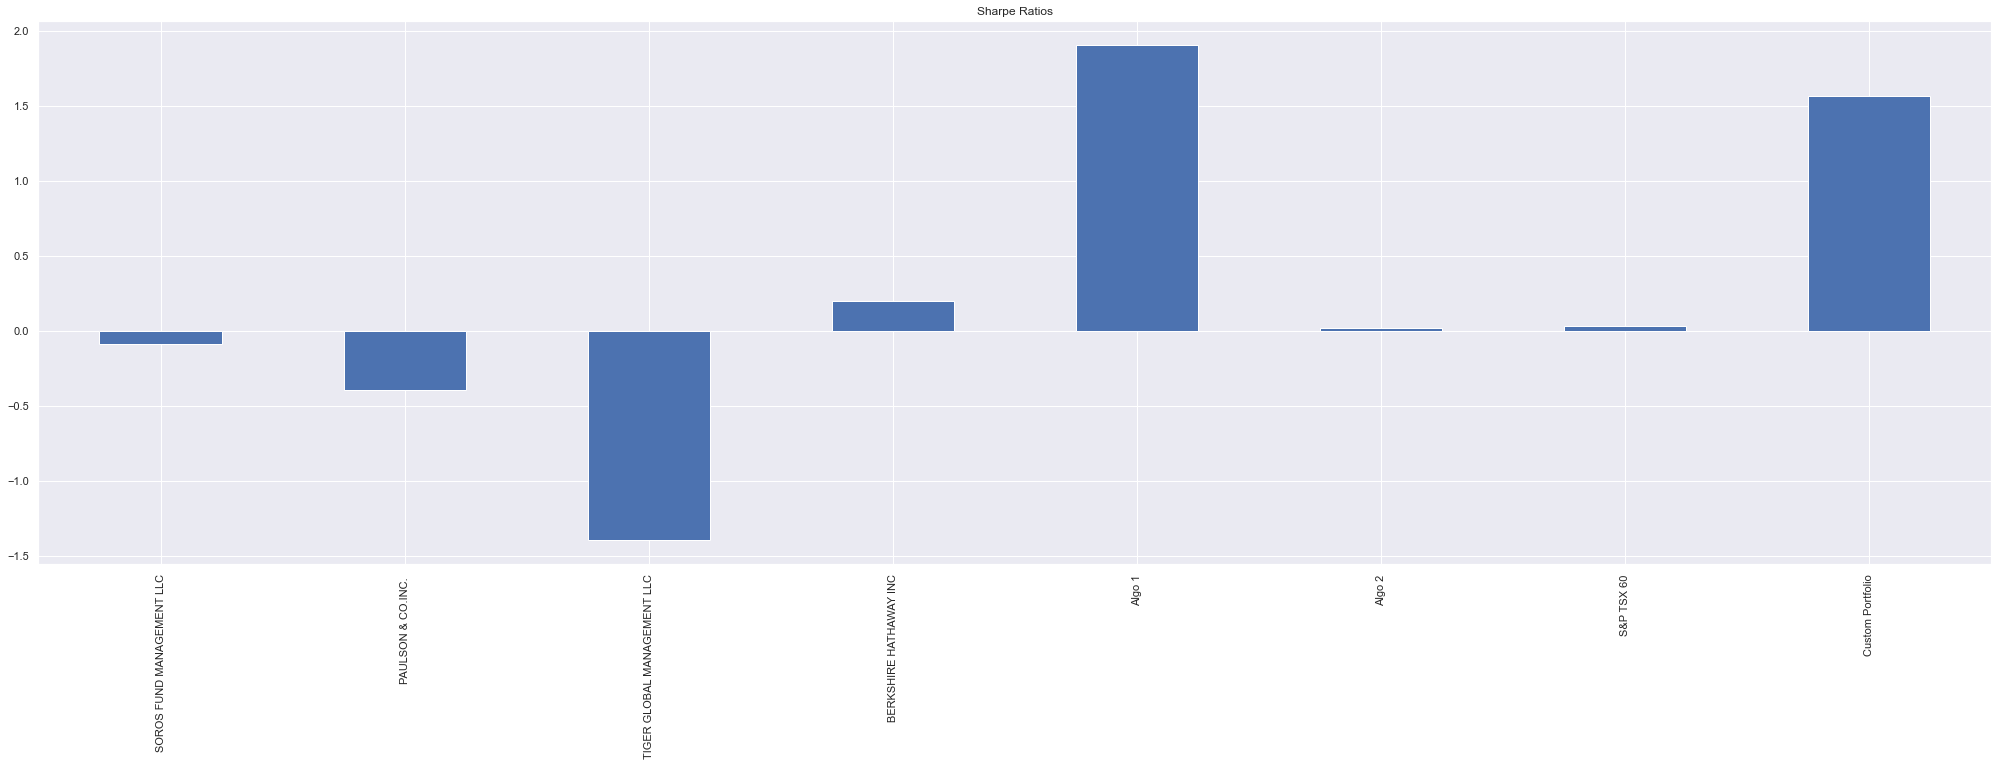

In [65]:
# Visualize the sharpe ratios as a bar plot
annual_combined_sharpe_ratios.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Similar to Algo 1 in its sharpe ratio, it also outperformed the S&P TSX 60. 

#### End of Report 